<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [4]:
##### Begin Working Here #####

import pandas as pd



In [5]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-07-11 14:20:43--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.11.197.48, 52.42.46.127, 34.213.98.158, ...
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.11.197.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [          <=>       ]  22.21M  1.99MB/s    in 12s     

2020-07-11 14:20:57 (1.85 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23289953]



In [6]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [7]:
LoanStats = pd.read_csv('LoanStats_2018Q4.csv', skipfooter=2, skiprows=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [232]:
LoanStats.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,...,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,...,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,...,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,...,66.7,0,0,137276,87876,58600,74676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,May-2020,4.0,0.0,ACTIVE,1086.68,9481.75,55.80,N,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
LoanStats['term'].head()
#data type is object

0     36 months
1     60 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [234]:
#Script for removing months and converting to integer
def killmonth(content):
  return int(content.strip('months'))

#This is one way it can be done
#deadmonths =[]
#for cell in LoanStats['term']:
  #deadmonths.append(killmonth(cell))

#applying funtion to all cells within LoanStats['term']

LoanStats['term'] = LoanStats['term'].apply(killmonth)

print(LoanStats['term'])

0         36
1         60
2         60
3         36
4         36
          ..
128407    36
128408    36
128409    36
128410    36
128411    36
Name: term, Length: 128412, dtype: int64


In [235]:
#checking datatype
type(LoanStats['term'][3])

numpy.int64

In [236]:
#Make a column named loan_status_is_great. It should contain the integer 1 
#if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.


#Checking for nan values and names of values
LoanStats['loan_status'].value_counts(dropna=False)

Current               84446
Fully Paid            31748
Charged Off            9759
Late (31-120 days)     1277
In Grace Period         889
Late (16-30 days)       277
Default                  16
Name: loan_status, dtype: int64

In [237]:
#this works is the first way I did it to figure out my logic

toreplace = ['Charged Off', 'Late (31-120 days)',
            'In Grace Period','Late (16-30 days)','Default','Current','Fully Paid']
x = int(0)
y = int(1)
toreplace2 = [x,x,x,x,x,y,y]

LoanStats['loan_status_is_great'] = LoanStats['loan_status'].replace(toreplace, toreplace2)

In [291]:
#this asks if status is current, fully paid, or anything else. 
def goodbad(status):
  if status in ['Current', 'Fully Paid'] :  
    return int(1)
  else:
    return int(0)

newlist = []

In [292]:
#This loops the function across every cell in the set

for number in LoanStats['loan_status']:
  newlist.append(goodbad(number))



In [293]:
LoanStats['loan_status_is_great'] = newlist

In [294]:
LoanStats['loan_status_is_great'].value_counts(dropna=False)

1    116194
0     12218
Name: loan_status_is_great, dtype: int64

In [295]:

LoanStats[['loan_status_is_great','loan_status']].head(10)

,loan_status_is_great,loan_status
0,0,Charged Off
1,1,Current
2,1,Current
3,1,Fully Paid
4,1,Current
5,1,Current
6,1,Current
7,0,Charged Off
8,0,Charged Off
9,1,Current


In [243]:
import datetime as dt


LoanStats['last_pymnt_d']

0         Oct-2019
1         Jun-2020
2         May-2020
3         Oct-2019
4         Jun-2020
            ...   
128407    Dec-2018
128408    Jun-2020
128409    Jun-2020
128410    Jun-2020
128411    Jun-2020
Name: last_pymnt_d, Length: 128412, dtype: object

In [244]:
#Make last_pymnt_d_month and last_pymnt_d_year columns.

In [245]:
#convert str to datetime64
LoanStats['last_pymnt_in_dt'] = pd.to_datetime(LoanStats['last_pymnt_d'], infer_datetime_format=True)
LoanStats['last_pymnt_in_dt'].dtype

dtype('<M8[ns]')

In [246]:
#append to dataset and break down into year or month
LoanStats['last_pymnt_d_month'] = LoanStats['last_pymnt_in_dt'].dt.month
LoanStats['last_pymnt_d_year'] = LoanStats['last_pymnt_in_dt'].dt.year

In [247]:
LoanStats['last_pymnt_d_month'] = LoanStats['last_pymnt_in_dt'].dt.month
LoanStats['last_pymnt_d_year'] = LoanStats['last_pymnt_in_dt'].dt.year

In [248]:
LoanStats['last_pymnt_d_month']

0         10.0
1          6.0
2          5.0
3         10.0
4          6.0
          ... 
128407    12.0
128408     6.0
128409     6.0
128410     6.0
128411     6.0
Name: last_pymnt_d_month, Length: 128412, dtype: float64

In [249]:
LoanStats[['last_pymnt_d_month','last_pymnt_d_year','last_pymnt_in_dt',]]

,last_pymnt_d_month,last_pymnt_d_year,last_pymnt_in_dt
0,10.0,2019.0,2019-10-01
1,6.0,2020.0,2020-06-01
2,5.0,2020.0,2020-05-01
3,10.0,2019.0,2019-10-01
4,6.0,2020.0,2020-06-01
...,...,...,...
128407,12.0,2018.0,2018-12-01
128408,6.0,2020.0,2020-06-01
128409,6.0,2020.0,2020-06-01
128410,6.0,2020.0,2020-06-01


In [250]:
type(LoanStats['last_pymnt_d_month'][0])

numpy.float64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [251]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [252]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [253]:
# %cd instacart_2017_05_01

In [496]:
#Lending club
import numpy as np
import pandas as pd

loans = pd.read_csv('/content/LoanStats_2018Q4.csv', skipfooter=2, skiprows=1)

loans['emp_title']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


0                        Sever
1         Supply Chain Analyst
2                      Teacher
3               Administrative
4          Sale Representative
                  ...         
128407          Tax Consultant
128408          security guard
128409            Payoff Clerk
128410                     NaN
128411    Key Accounts Manager
Name: emp_title, Length: 128412, dtype: object

In [497]:
#dropping null values
loans['emp_title'] 

0                        Sever
1         Supply Chain Analyst
2                      Teacher
3               Administrative
4          Sale Representative
                  ...         
128407          Tax Consultant
128408          security guard
128409            Payoff Clerk
128410                     NaN
128411    Key Accounts Manager
Name: emp_title, Length: 128412, dtype: object

In [498]:
#checking for remaining null values
loans['emp_title'].isnull().sum()

20947

In [499]:
#list of top 20 job gathered from dataset

t20 = ['Teacher', 'Manager', 'Registered Nurse', 'Driver', 'RN', 'Supervisor',
       'Sales', 'Project Manager', 'General Manager', 'Office Manager',
       'Owner', 'Director', 'Operations Manager', 'Truck Driver', 'Nurse',
       'Engineer', 'Sales Manager', 'manager', 'Supervisor ',
       'Administrative Assistant']
newlist = []



In [500]:
def titlechanger(title):
  if title in ['Teacher', 'Manager', 'Registered Nurse', 'Driver', 'RN', 'Supervisor',
       'Sales', 'Project Manager', 'General Manager', 'Office Manager',
       'Owner', 'Director', 'Operations Manager', 'Truck Driver', 'Nurse',
       'Engineer', 'Sales Manager', 'manager', 'Supervisor ',
       'Administrative Assistant']:  
    return title
  else:
    return 'Other'


In [501]:
for title in loans['emp_title']:
  newlist.append(titlechanger(title))

In [502]:
loans['df'] = newlist

In [503]:
loans[['df', 'emp_title']]

,df,emp_title
0,Other,Sever
1,Other,Supply Chain Analyst
2,Teacher,Teacher
3,Other,Administrative
4,Other,Sale Representative
...,...,...
128407,Other,Tax Consultant
128408,Other,security guard
128409,Other,Payoff Clerk
128410,Other,NaN


In [504]:
professions = loans[loans['df']!='Other']

In [ ]:
#value counts to determine percentage of employees in relative field effected

professionalcounts = professions['df'].value_counts()
proflist = []

In [427]:
#extract values from value counts in professionalcounts = professions['df'].value_counts()
for x in range(20):
  proflist.append(professionalcounts[x])

TypeError: ignored

In [505]:
#crosstab of payments affected by covid by profession
covidskip_title = pd.crosstab(professions['emp_title'], professions['hardship_type'],  normalize=True)

In [269]:
#professions sorted by number of skips due to covid
covidskip_job_sorted = covidskip_title.sort_values(by = 'CVD19SKIP')

In [ ]:
covidskip_job_sorted['employee_total'] = values_c

ValueError: ignored

In [508]:
covidskip_job_sorted

hardship_type,CVD19SKIP,DR02INTV01,INTEREST ONLY-3 MONTHS DEFERRAL,ST0650PV01,All,employee_total
emp_title,,,,,,
Supervisor,20,0,0,0,20,NaN
Operations Manager,20,4,0,1,25,NaN
Administrative Assistant,21,1,0,1,23,NaN
Engineer,22,4,0,0,26,NaN
Director,31,3,0,1,35,NaN
Nurse,33,1,0,0,34,NaN
Truck Driver,34,1,1,0,36,NaN
Project Manager,36,4,0,0,40,NaN
manager,37,2,0,1,40,NaN


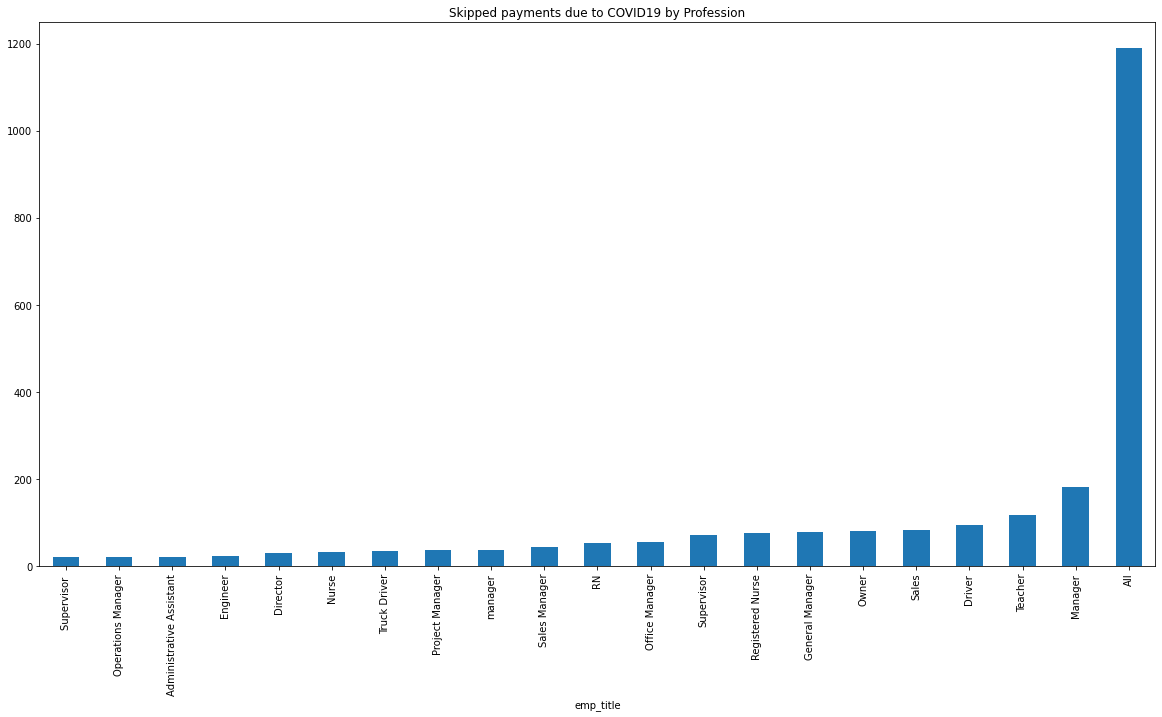

In [495]:
#bar plot displaying which professions where unable to pay because of COVID19
covidskip_job_sorted['CVD19SKIP'].plot(kind = 'bar',figsize=(20,10), title=('Skipped payments due to COVID19 by Profession'), x=(('number of skipped')),
)